<a href="https://colab.research.google.com/github/alonsosilvaallende/Survival_Analysis/blob/master/Testing_concordance_indexes-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing concordance indexes of lifelines, scikit-survival, and pysurvival
[Alonso Silva](http://www.dim.uchile.cl/~alsilva/) [(@alonsosilva)](https://twitter.com/alonsosilva) | 2019/09/30

In [0]:
# install scikit-survival, lifelines, and pysurvival
pip install -q scikit-survival lifelines pysurvival

In [0]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

The objective of this notebook is to compare the concordance indexes of three different libraries on survival analysis.

In [0]:
from lifelines.utils import concordance_index as ci_lifelines
from pysurvival.utils.metrics import concordance_index as ci_pysurvival
from sksurv.metrics import concordance_index_censored as ci_scikit

Lifelines concordance index inputs are:

+ event/censoring times
+ predicted scores
+ event observed (*optional*). The default assumes all events observed.

Lifelines concordance index output is:

+ concordance index

In [4]:
events = [0, 1, 2, 3, 4]
preds_scores = [0, 1, 2, 3, 4]
event_obs = [True, True, True, True, True]

print(f'Concordance-index (lifelines): {ci_lifelines(events, preds_scores, event_obs)}')

Concordance-index (lifelines): 1.0


Scikit-survival's concordance index inputs are:
+ event observed
+ event/censoring times
+ predicted risks
+ tied tolerance (float, optional, default: 1e-8) – The tolerance value for considering ties. If the absolute difference between risk scores is smaller or equal than tied_tol, risk scores are considered tied. 

Scikit-survival's concordance index outputs are:

+ Concordance index
+ Number of concordant pairs
+ Number of discordant pairs
+ Number of pairs having tied estimated risks
+ Number of comparable pairs sharing the same time

In [5]:
events = [0, 1, 2, 3, 4]
preds_risks = [4, 3, 2, 1, 0]
event_obs = [True, True, True, True, True]

print(f'Concordance-index (scikit-survival): {ci_scikit(event_obs, events, preds_risks)[0]}')

Concordance-index (scikit-survival): 1.0


As mentioned above, scikit survival also gives the number of concordant pairs, number of discordant pairs, number of pairs having tied estimated risks, and the number of comparable pairs sharing the same time.

In [6]:
print(f'Number of concordant pairs (scikit-survival): {ci_scikit(event_obs, events, preds_risks)[1]}')
print(f'Number of discordant pairs (scikit-survival): {ci_scikit(event_obs, events, preds_risks)[2]}')
print(f'Number of pairs having tied estimated risks (scikit-survival): {ci_scikit(event_obs, events, preds_risks)[3]}')
print(f'Number of comparable pairs sharing the same time (scikit-survival): {ci_scikit(event_obs, events, preds_risks)[4]}')

Number of concordant pairs (scikit-survival): 10
Number of discordant pairs (scikit-survival): 0
Number of pairs having tied estimated risks (scikit-survival): 0
Number of comparable pairs sharing the same time (scikit-survival): 0


Lifelines gives the concordance between the actuals and the predicted *scores*, while scikit-survival gives the concordance between the actuals and the predicted *risks*, so over the same lists, they are the complete opposite.

$$
\textrm{Concordance-index (lifelines)}= 1-\textrm{Concordance-index (scikit-survival)}
$$


In [7]:
actuals = [0, 1, 2, 3, 4]
preds = [4, 3, 2, 1, 0]
event_obs = [True, True, True, True, True]

print(f'Concordance-index lifelines: {ci_lifelines(actuals, preds, event_obs)}')
print(f'Concordance-index scikit-survival: {ci_scikit(event_obs, actuals, preds)[0]}')

Concordance-index lifelines: 0.0
Concordance-index scikit-survival: 1.0


Let's see a more interesting example:

In [30]:
actuals = [0, 1, 2, 3, 4]
preds = [4, 3, 1, 2, 0]
event_obs = [True, True, True, True, True]

print(f'Concordance-index lifelines: {ci_lifelines(actuals, preds, event_obs):.3f}')
print(f'Concordance-index scikit-survival: {ci_scikit(event_obs, actuals, preds)[0]:.3f}')
print(f'Number of concordant pairs scikit-survival: {ci_scikit(event_obs, actuals, preds)[1]}')
print(f'Number of discordant pairs scikit-survival: {ci_scikit(event_obs, actuals, preds)[2]}')
df = pd.DataFrame(data={'actuals':actuals, 'predictions': preds, 'event_observed': event_obs}); df

Concordance-index lifelines: 0.100
Concordance-index scikit-survival: 0.900
Number of concordant pairs scikit-survival: 9
Number of discordant pairs scikit-survival: 1


,actuals,predictions,event_observed
0,0,4,True
1,1,3,True
2,2,1,True
3,3,2,True
4,4,0,True


In the previous example the order of the pair (2,3) has been inversed which causes a discordant pair (in terms of risks). There is 9 concordant pairs (in terms of risks) out of 10 pairs, therefore c-index=0.9.

Let's see an example with censoring:

In [29]:
actuals = [0, 1, 2, 3, 4]
preds = [4, 1.5, 2, 1, 0]
event_obs = [True, True, False, True, True]

print(f'Concordance-index lifelines: {ci_lifelines(actuals, preds, event_obs):.3f}')
print(f'Concordance-index scikit-survival: {ci_scikit(event_obs, actuals, preds)[0]:.3f}')
print(f'Number of concordant pairs scikit-survival: {ci_scikit(event_obs, actuals, preds)[1]}')
print(f'Number of discordant pairs scikit-survival: {ci_scikit(event_obs, actuals, preds)[2]}')
df = pd.DataFrame(data={'actuals':actuals, 'predictions': preds, 'event_observed': event_obs}); df

Concordance-index lifelines: 0.125
Concordance-index scikit-survival: 0.875
Number of concordant pairs scikit-survival: 7
Number of discordant pairs scikit-survival: 1


,actuals,predictions,event_observed
0,0,4.0,True
1,1,1.5,True
2,2,2.0,False
3,3,1.0,True
4,4,0.0,True


Since the event $2$ is censored, the pairs $(2,3)$ and $(2,4)$ don't appear in the potential comparisons pairs. There is only one discordant pair $(1,2)$ since in the actuals $2$ lived longer than $1$, while in the predictions $1$ has lower risk than $2$.

Pysurvival concordance index inputs are:
+ a model
+ input samples
+ event/censoring times
+ event observed

Pysurvival concordance index outputs are:
+ 

needs a modes as input so it's harder to see what does the concordance index do.

In [0]:
np.random.seed(42)
x = np.linspace(0,10)
y = x + np.random.normal(0, 1, x.shape)

In [0]:
x1 = x[...,None] # we add a dimension so that RandomSurvivalForestModel doesn't complain
x_trn, x_val = x1[:40], x1[40:]
y_trn, y_val = y[:40], y[40:]

In [32]:
from pysurvival.models.survival_forest import RandomSurvivalForestModel

rsf = RandomSurvivalForestModel(num_trees=10)
%time rsf.fit(x_trn, y_trn, np.ones(len(x_trn)), seed=0)

CPU times: user 9.65 ms, sys: 2.71 ms, total: 12.4 ms
Wall time: 21.4 ms


RandomSurvivalForestModel

In [0]:
event_obs = [True for i in range(len(x_trn))]

In [34]:
ci_pysurvival(rsf, x_trn, y_trn, event_obs, additional_results=True)

{0: 0.8243589743589743, 1: 1560.0, 2: 1286.0}

In [35]:
ci_scikit(event_obs, y_trn, rsf.predict_risk(x_trn))

(0.8243589743589743, 545, 39, 196, 0)

In [37]:
1-ci_lifelines(y_trn, rsf.predict_risk(x_trn), event_obs)

0.8243589743589743

I have no idea why the concordance index find more concordance pairs and more pairs overall but the result in the three cases is the same.

Let's do random predictions and see what concordance index do we obtain.

In [0]:
actuals = np.arange(0,10,1)

# choose 20 random seeds
np.random.seed(0)
seeds = np.random.permutation(1000)[:100]

ci_random = []
for _seed in seeds:
  np.random.seed(_seed); preds_random = np.random.permutation(np.arange(0,10,1))
  ci_random.append(ci_lifelines(actuals,preds_random))

In [18]:
print(f'Mean concordance index of random predictions: {np.mean(ci_random):.3f}')

Mean concordance index of random predictions: 0.517


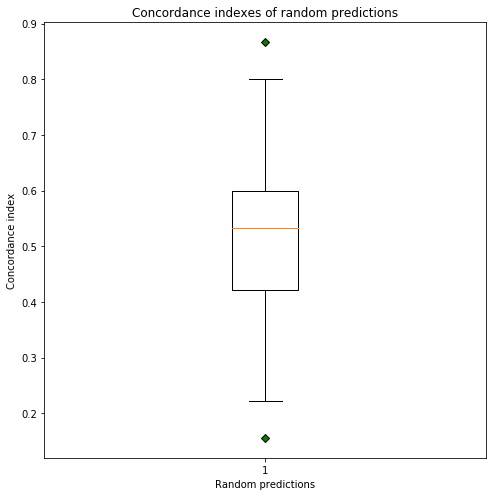

In [19]:
data = ci_random
green_diamond = dict(markerfacecolor='g', marker='D')

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.set_title('Concordance indexes of random predictions')
ax1.boxplot(data, notch=False, flierprops=green_diamond)
ax1.set_xlabel('Random predictions')
ax1.set_ylabel('Concordance index')
plt.tight_layout()
plt.show()

**Sources**

+ [Lifelines' concordance index](https://lifelines.readthedocs.io/en/latest/lifelines.utils.html#lifelines.utils.concordance_index)
+ [Scikit-survival's concordance index](https://scikit-survival.readthedocs.io/en/latest/generated/sksurv.metrics.concordance_index_censored.html#sksurv.metrics.concordance_index_censored)
+ [Pysurvival's concordance index](https://square.github.io/pysurvival/metrics/c_index.html)